### SVM Classification on ForestFire

In [1]:
### Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Reading Dataset
data = pd.read_csv('forestfires.csv')
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


#### EDA

In [3]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
data['month'] = encoder.fit_transform(data['month'])

In [8]:
data['day'] = encoder.fit_transform(data['day'])

In [9]:
data['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [10]:
data['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [11]:
### Class variable encoded to '0' for Large and '1' for small
data['size_category'] = encoder.fit_transform(data['size_category'])

In [12]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
516,9,5,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
#data.drop(data.columns[11:30], axis=1, inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [14]:
corr = data.corr()

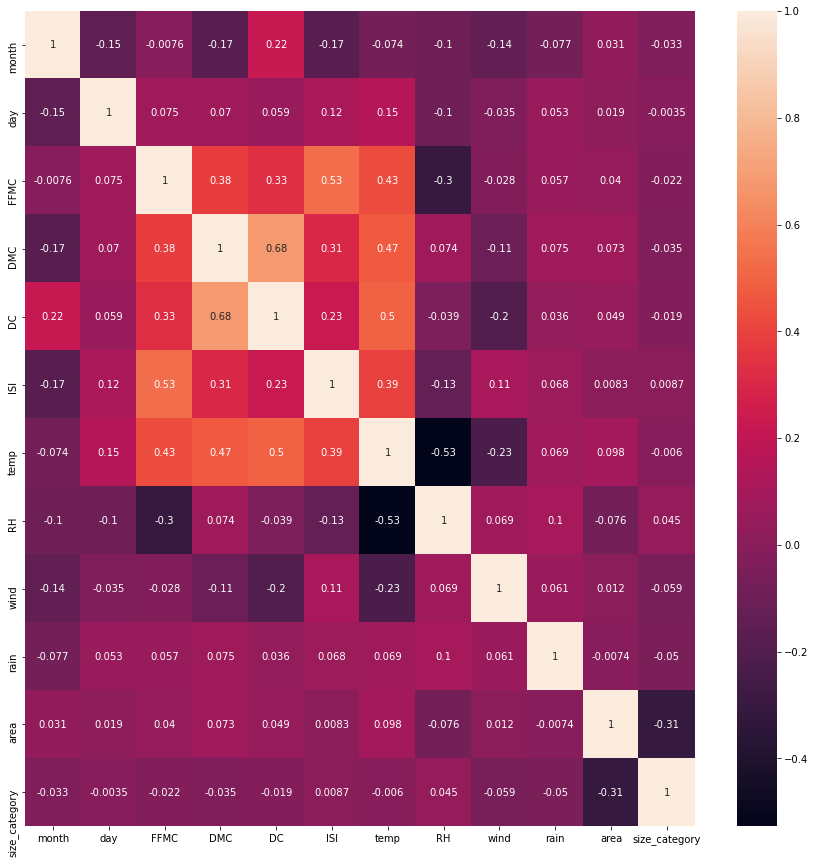

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)

In [17]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <a list of 10 Patch objects>)

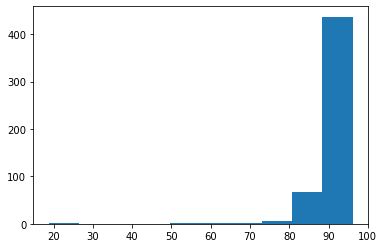

In [21]:
plt.hist(data['FFMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8cbc9bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8cc79e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8cbcf460>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8bb762b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8cbe2970>],
 'means': []}

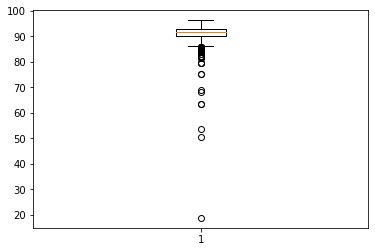

In [22]:
plt.boxplot(data['FFMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8cd26070>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8cd2cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8cd26e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8cd2c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8cd224f0>],
 'means': []}

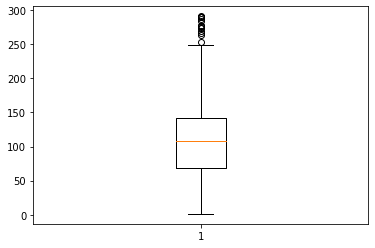

In [23]:
plt.boxplot(data['DMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8cbc9d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8cbc64c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8cbc3550>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8cbd5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8bb769d0>],
 'means': []}

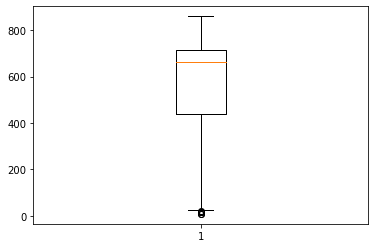

In [24]:
plt.boxplot(data['DC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8cbac7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8cbacdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8cd76820>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8cbacfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8cce4eb0>],
 'means': []}

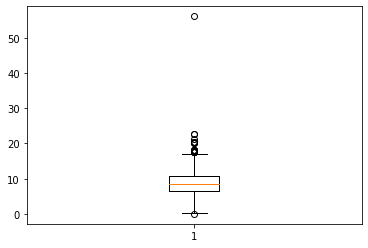

In [25]:
plt.boxplot(data['ISI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf8cee8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf8cef66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf8cee8c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf8cef6d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf8ceff0d0>],
 'means': []}

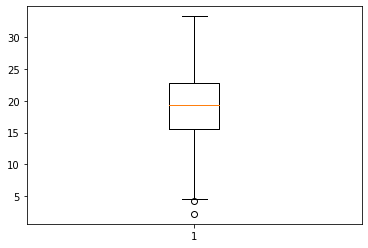

In [27]:
plt.boxplot(data['temp'])

In [30]:
### Splitting X and Y
X = data.iloc[:, :11]
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [32]:
Y = data['size_category']
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [35]:
cols = X.columns
cols

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')

In [36]:
### Normalization
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [37]:
X_norm

array([[0.63636364, 0.        , 0.87096774, ..., 0.7       , 0.        ,
        0.        ],
       [0.90909091, 0.83333333, 0.92774194, ..., 0.05555556, 0.        ,
        0.        ],
       [0.90909091, 0.33333333, 0.92774194, ..., 0.1       , 0.        ,
        0.        ],
       ...,
       [0.09090909, 0.5       , 0.8116129 , ..., 0.7       , 0.        ,
        0.01023065],
       [0.09090909, 0.33333333, 0.97677419, ..., 0.4       , 0.        ,
        0.        ],
       [0.81818182, 0.83333333, 0.78451613, ..., 0.45555556, 0.        ,
        0.        ]])

In [39]:
X = pd.DataFrame(X_norm, columns=cols)
X.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [46]:
X_train.shape, X_test.shape

((361, 11), (156, 11))

In [95]:
### Grid Search method to identify best parameters.
model = SVC()
param_grid = [{'kernel':['rbf','poly','sigmoid'],'gamma':range(90,100),'C':(80,85,90,95,100) }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': (80, 85, 90, 95, 100), 'gamma': range(90, 100),
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [96]:
gsv.best_params_, gsv.best_score_

({'C': 80, 'gamma': 91, 'kernel': 'poly'}, 0.9028528528528528)

In [105]:
## Model building with Poly kernel
model = SVC(C=80, kernel='poly', gamma=91)

In [106]:
model.fit(X_train, Y_train)

SVC(C=80, gamma=91, kernel='poly')

In [107]:
y_pred_train = model.predict(X_train)

In [108]:
y_pred_train

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [109]:
y_pred_test = model.predict(X_test)

In [110]:
y_pred_test

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [112]:
acc_test = accuracy_score(Y_test, y_pred_test)*100
print('Test Accuracy =', acc_test)

Test Accuracy = 88.46153846153845


In [114]:
RMSE_test = (np.mean((y_pred_test - Y_test)**2))*100
print(RMSE_test) 

11.538461538461538


In [117]:
from sklearn.metrics import confusion_matrix, classification_report

In [118]:
print(confusion_matrix(y_pred_test, Y_test))

[[ 27   9]
 [  9 111]]


In [119]:
print(classification_report(y_pred_test, Y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.93      0.93      0.93       120

    accuracy                           0.88       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.88      0.88      0.88       156

